In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")

In [5]:
import torch
import numpy as np
import networkx as nx
import os

In [6]:
results_dir = "../results/2021-08-09_06-49_dist_dense_v1"

results1 = torch.load(os.path.join(results_dir, "config1_results.pt"), map_location=torch.device("cpu"))
results2 = torch.load(os.path.join(results_dir, "config2_results.pt"), map_location=torch.device("cpu"))
# results3 = torch.load(os.path.join(results_dir, "rho_01_results.pt"), map_location=torch.device("cpu"))
results_solo = torch.load(os.path.join(results_dir, "solo_results.pt"), map_location=torch.device("cpu"))


# Communication Graph

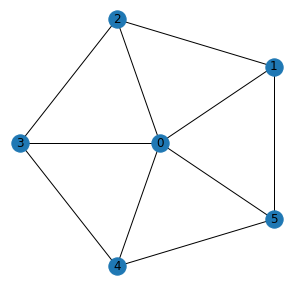

In [7]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)

# Validation loss

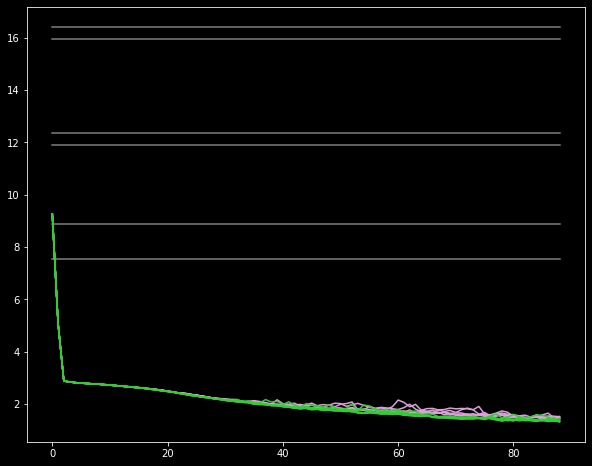

In [20]:
vl1 = torch.stack(results1["validation_loss"])
vl2 = torch.stack(results2["validation_loss"])
#vl3 = torch.stack(results3["validation_loss"])

(fig, ax) = plt.subplots(figsize=(10, 8))

t = np.arange(vl1.shape[0])

for i in results_solo.keys():
    ax.plot(t, results_solo[i]["validation_loss"] * np.ones_like(t), color="gray")

ax.plot(vl1, color="plum")
ax.plot(vl2, color="limegreen")
#ax.plot(vl3, color="royalblue")
#ax.set_yscale("log")

# Density Plots

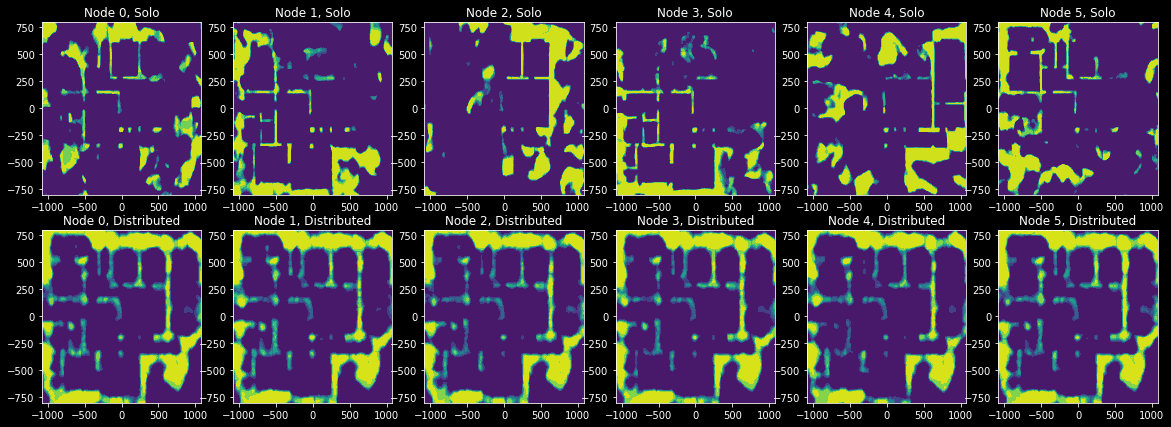

In [17]:
dens = results2["mesh_grid_density"]
locs = results2["mesh_inputs"]

N = G.number_of_nodes()
(fig, axs) = plt.subplots(nrows=2, ncols=N, figsize=(20, 7))

for i in range(N):
    solo_dens = results_solo[i]["mesh_grid_density"]
    axs[0, i].tricontourf(locs[:, 0], locs[:, 1], torch.squeeze(solo_dens))
    axs[0, i].set_title("Node {}, Solo".format(i))
    dist_dens = (torch.squeeze(dens[-1]))[i, :]
    axs[1, i].tricontourf(locs[:, 0], locs[:, 1], dist_dens)
    axs[1, i].set_title("Node {}, CADMM".format(i))


# Denisty Animation

/home/javier/workspace/nn_distributed_training/venv/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


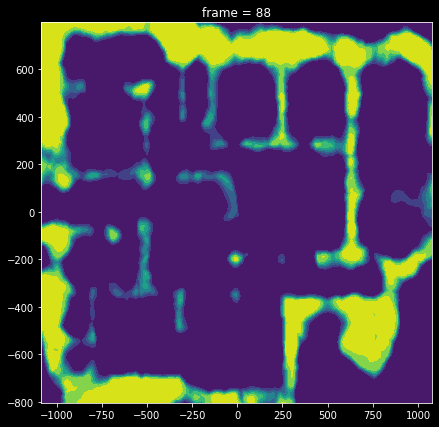

In [18]:
dens1 = results2["mesh_grid_density"]
locs = results2["mesh_inputs"]

num_frames = len(dens1)
agent = 3

(fig, ax) = plt.subplots(figsize=(7, 7))

def animate(i):
    global cont
    z = (torch.squeeze(dens1[i]))[agent, :]
    ax.tricontourf(locs[:, 0], locs[:, 1], z)
    ax.set_title("frame = {}".format(i))

anim = animation.FuncAnimation(fig, animate, frames=num_frames, repeat=True)
anim.save("density_animation.mp4")